In [97]:
from plots import plot_policy_convergence, plot_final_policies, plot_final_policies_linear, plot_specific_state_policy, plot_specific_state_policy_linear
import pickle

In [98]:
from matplotlib import pyplot as plt
import numpy as np
import copy

# Output v0

    U = 2                 
    T = 11            
    delta_t = 1          
    n_travelers = 600
    # KZ: preset initial karma balance
    K = 100 # if this is not enough, the code will crash because out of bound index in the policy state
    k_init = 10
    # Group preference = t_star ∈ {0,1,...,T-1}
    n_groups = 1
    t_star = 8
    phi = np.array([[0.8, 0.2],
                    [0.8, 0.2]])
    u_value = np.array([1.0, 6.0]) # from the paper
    delta = 0.9 
    eta = 0.1 
    alpha = 1.6 # queueing weight
    beta = 1 # early arrival weight
    gamma = 4 # late arrival weight
    ...
    fast_lane_capacity = 12 # MM from the paper
    slow_lane_capacity = 48

In [5]:
# with open('../groups.pkl', 'rb') as f:
#     groups = pickle.load(f)

# with open('../error_vec.pkl', 'rb') as f:
#     error_vec = pickle.load(f)

# with open('../simulation_params.pkl', 'rb') as f:
#     n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v0/groups.pkl', 'rb') as f:
    groups = pickle.load(f)

with open('output_v0/error_vec.pkl', 'rb') as f:
    error_vec = pickle.load(f)

with open('output_v0/simulation_params.pkl', 'rb') as f:
    n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v0/system.pkl', 'rb') as f:
    system = pickle.load(f)

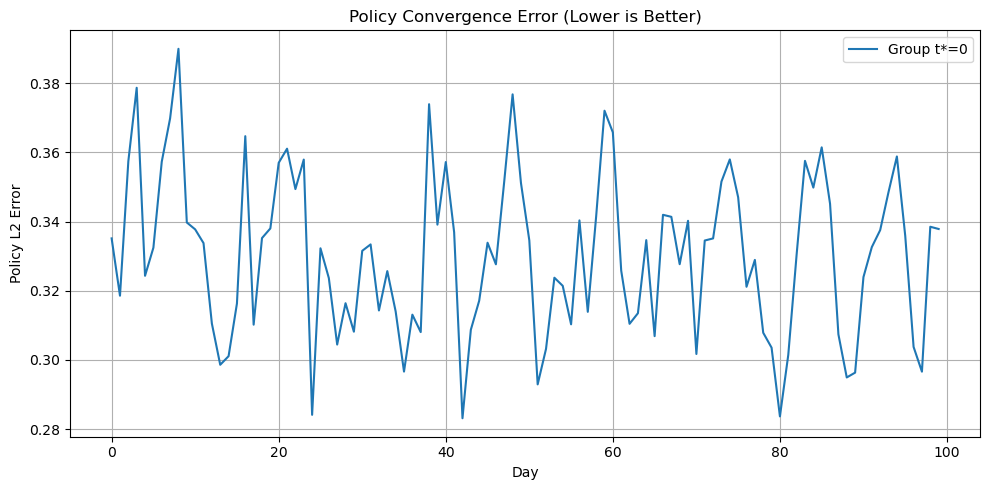

In [6]:
plot_policy_convergence(error_vec, n_day, n_groups)

In [7]:
old_pi = groups[0].pi 
old_Q = groups[0].Q

In [8]:
old_b_star = system.b_star
old_slow_lane_queue = system.slow_lane_queue
old_psi = system.psi

In [9]:
U = 2                 
K = 100    
T = 11

In [10]:
travelers = groups[0].travelers

In [11]:
# one day simulation 
# 1. Travelers act
for tr in travelers:
    tr.store_start_state()
    tr.action()

# 2. System queues
system.simulate_lane_queue()

# 3. Payment
for tr in travelers:
    tr.paid_karma_bid()

# 4. Redistribution
system.karma_redistribution()

# 5. Update urgency
for tr in travelers:
    tr.update_urgency()

# Update each group (independent policies)
g = groups[0]
g.update_transition_matrix()
g.update_policy(system)

In [12]:
# difference in policy by state
np.round(np.linalg.norm(g.pi - old_pi, axis=1), 2)

array([0.05, 0.04, 0.04, 0.07, 0.07, 0.06, 0.05, 0.04, 0.03, 0.04, 0.03,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.03, 0.02, 0.03, 0.03, 0.03,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.09, 0.06, 0.05, 0.07, 0.07, 0.04, 0.04, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.08, 0.03, 0.06, 0.05, 0.08, 0.06, 0.08, 0.07,
       0.08, 0.02, 0.03, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

In [13]:
np.round(np.linalg.norm(g.pi, axis=1), 2)

array([0.35, 0.25, 0.2 , 0.21, 0.18, 0.14, 0.14, 0.13, 0.12, 0.12, 0.11,
       0.11, 0.11, 0.11, 0.12, 0.12, 0.15, 0.14, 0.15, 0.19, 0.2 , 0.19,
       0.21, 0.2 , 0.19, 0.19, 0.18, 0.18, 0.17, 0.17, 0.16, 0.16, 0.15,
       0.15, 0.15, 0.14, 0.14, 0.14, 0.13, 0.13, 0.13, 0.13, 0.12, 0.12,
       0.12, 0.12, 0.12, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.11, 0.1 ,
       0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.09, 0.09, 0.09,
       0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,
       0.07, 0.07, 0.38, 0.27, 0.22, 0.2 , 0.18, 0.16, 0.16, 0.14, 0.13,
       0.14, 0.13, 0.14, 0.26, 0.21, 0.23, 0.27, 0.37, 0.3 , 0.41, 0.48,
       0.43, 0.46, 0.42, 0.39, 0.36, 0.34, 0.32, 0.3 , 0.29, 0.28, 0.27,
       0.26, 0.25, 0.24, 0.23, 0.23, 0.22, 0.22, 0.21, 0.21, 0.2 , 0.2 ,
       0.19, 0.19, 0.19, 0.18, 0.18, 0.18, 0.17, 0.

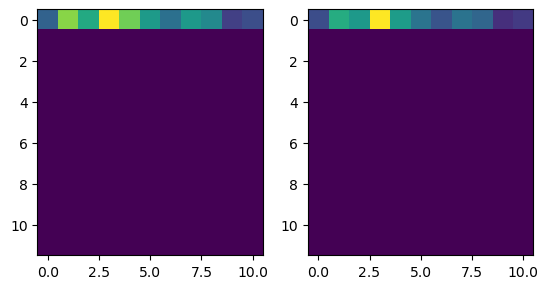

In [14]:
# plot policy by state 
u = 0
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

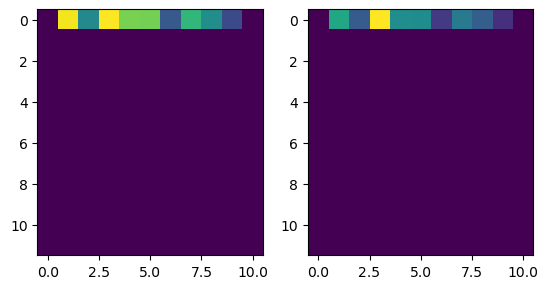

In [15]:
# plot policy by state 
u = 1
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

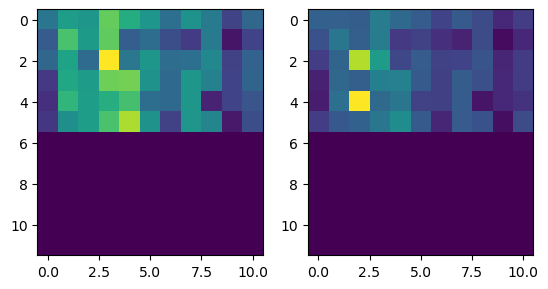

In [16]:
# plot policy by state 
u = 0
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

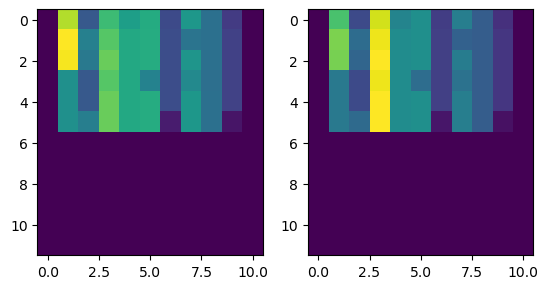

In [17]:
# plot policy by state 
u = 1
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [18]:
# system dynamics
old_b_star, system.b_star

(array([ 3.,  6.,  8.,  9., 12., 13., 15., 17., 17., 12.,  3.]),
 array([ 3.,  6.,  8.,  9., 12., 13., 15., 17., 17., 12.,  3.]))

# Output v1

    U = 2                 
    T = 11            
    delta_t = 1          
    n_travelers = 600
    # KZ: preset initial karma balance
    K = 100 # if this is not enough, the code will crash because out of bound index in the policy state
    k_init = 10
    # Group preference = t_star ∈ {0,1,...,T-1}
    n_groups = 1
    t_star = 8
    phi = np.array([[0.8, 0.2],
                    [0.8, 0.2]])
    u_value = np.array([1.0, 6.0]) # from the paper
    delta = 0.9 
    eta = 0.01 
    alpha = 1.6 # queueing weight
    beta = 1 # early arrival weight
    gamma = 4 # late arrival weight
    ...
    fast_lane_capacity = 12 # MM from the paper
    slow_lane_capacity = 48

eta = 0.01

In [19]:
# with open('../groups.pkl', 'rb') as f:
#     groups = pickle.load(f)

# with open('../error_vec.pkl', 'rb') as f:
#     error_vec = pickle.load(f)

# with open('../simulation_params.pkl', 'rb') as f:
#     n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v1/groups.pkl', 'rb') as f:
    groups = pickle.load(f)

with open('output_v1/error_vec.pkl', 'rb') as f:
    error_vec = pickle.load(f)

with open('output_v1/simulation_params.pkl', 'rb') as f:
    n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v1/system.pkl', 'rb') as f:
    system = pickle.load(f)

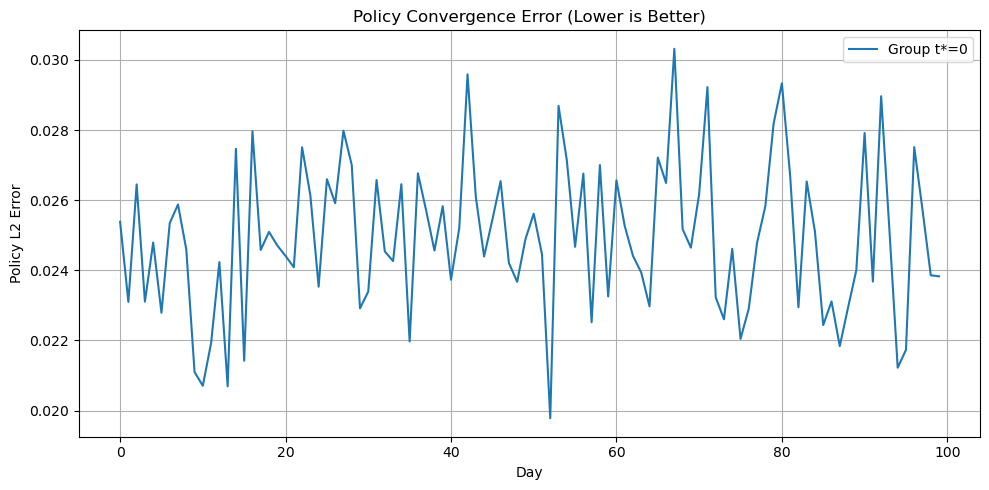

In [20]:
plot_policy_convergence(error_vec, n_day, n_groups)

In [21]:
old_pi = groups[0].pi 
old_Q = groups[0].Q

In [22]:
old_b_star = system.b_star
old_slow_lane_queue = system.slow_lane_queue
old_psi = system.psi

In [23]:
U = 2                 
K = 100    
T = 11

In [24]:
travelers = groups[0].travelers

In [25]:
# one day simulation 
# 1. Travelers act
for tr in travelers:
    tr.store_start_state()
    tr.action()

# 2. System queues
system.simulate_lane_queue()

# 3. Payment
for tr in travelers:
    tr.paid_karma_bid()

# 4. Redistribution
system.karma_redistribution()

# 5. Update urgency
for tr in travelers:
    tr.update_urgency()

# Update each group (independent policies)
g = groups[0]
g.update_transition_matrix()
g.update_policy(system)

In [26]:
# difference in policy by state
np.round(np.linalg.norm(g.pi - old_pi, axis=1), 2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

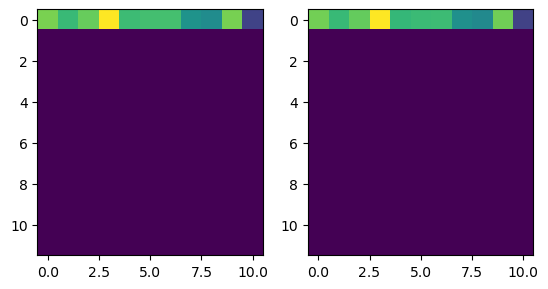

In [27]:
# plot policy by state 
u = 0
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

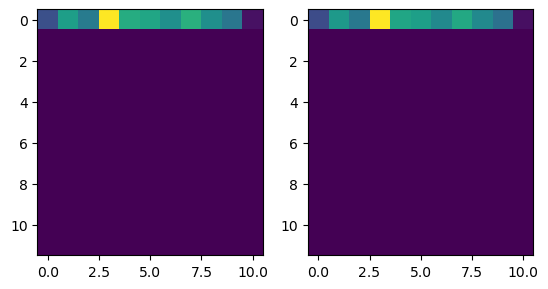

In [28]:
# plot policy by state 
u = 1
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

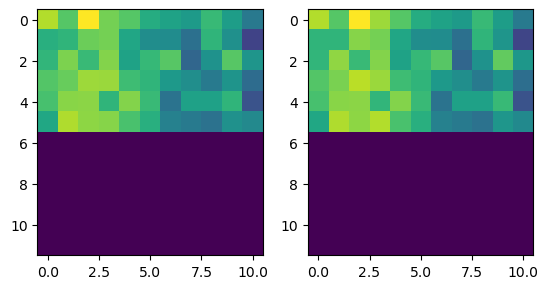

In [29]:
# plot policy by state 
u = 0
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

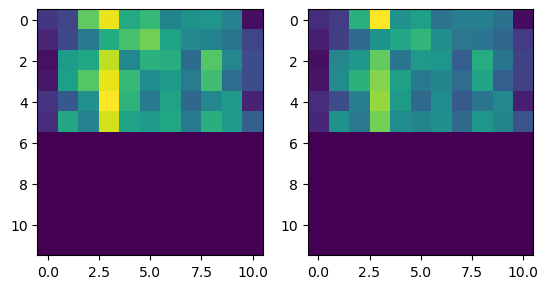

In [30]:
# plot policy by state 
u = 1
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [31]:
# system dynamics
old_b_star, system.b_star

(array([ 5.,  7.,  7.,  8., 11., 12., 11., 13., 14.,  9.,  4.]),
 array([ 5.,  7.,  7.,  8., 11., 12., 11., 13., 14.,  9.,  4.]))

# Output v2

    U = 2                 
    T = 11            
    delta_t = 1          
    n_travelers = 600
    # KZ: preset initial karma balance
    K = 100 # if this is not enough, the code will crash because out of bound index in the policy state
    k_init = 10
    # Group preference = t_star ∈ {0,1,...,T-1}
    n_groups = 1
    t_star = 8
    phi = np.array([[0.8, 0.2],
                    [0.8, 0.2]])
    u_value = np.array([1.0, 6.0]) # from the paper
    delta = 0.9 
    eta = 0.1 
    alpha = 1.6 # queueing weight
    beta = 1 # early arrival weight
    gamma = 4 # late arrival weight
    ...
    fast_lane_capacity = 12 # MM from the paper
    slow_lane_capacity = 48

increase the number of days to 500

In [32]:
# with open('../groups.pkl', 'rb') as f:
#     groups = pickle.load(f)

# with open('../error_vec.pkl', 'rb') as f:
#     error_vec = pickle.load(f)

# with open('../simulation_params.pkl', 'rb') as f:
#     n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v2/groups.pkl', 'rb') as f:
    groups = pickle.load(f)

with open('output_v2/error_vec.pkl', 'rb') as f:
    error_vec = pickle.load(f)

with open('output_v2/simulation_params.pkl', 'rb') as f:
    n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v2/system.pkl', 'rb') as f:
    system = pickle.load(f)

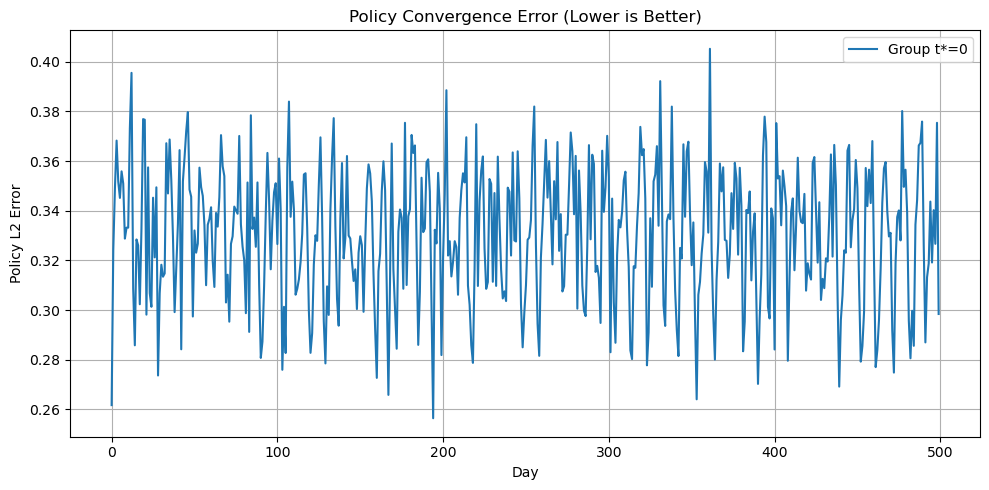

In [33]:
plot_policy_convergence(error_vec, n_day, n_groups)

In [34]:
old_pi = groups[0].pi 
old_Q = groups[0].Q

In [35]:
old_b_star = system.b_star
old_slow_lane_queue = system.slow_lane_queue
old_psi = system.psi

In [36]:
U = 2                 
K = 100    
T = 11

In [37]:
travelers = groups[0].travelers

In [38]:
# one day simulation 
# 1. Travelers act
for tr in travelers:
    tr.store_start_state()
    tr.action()

# 2. System queues
system.simulate_lane_queue()

# 3. Payment
for tr in travelers:
    tr.paid_karma_bid()

# 4. Redistribution
system.karma_redistribution()

# 5. Update urgency
for tr in travelers:
    tr.update_urgency()

# Update each group (independent policies)
g = groups[0]
g.update_transition_matrix()
g.update_policy(system)

In [39]:
# difference in policy by state
np.round(np.linalg.norm(g.pi - old_pi, axis=1), 2)

array([0.07, 0.05, 0.04, 0.06, 0.04, 0.04, 0.04, 0.03, 0.02, 0.03, 0.03,
       0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.09, 0.06, 0.05, 0.09, 0.04, 0.04, 0.04, 0.04, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.03,
       0.04, 0.04, 0.04, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.

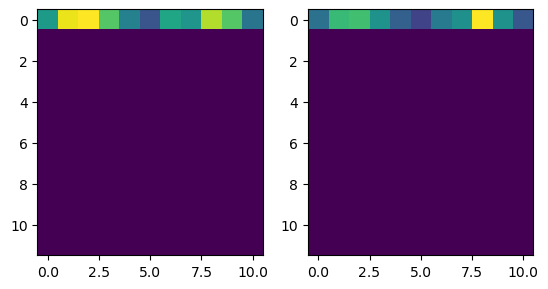

In [40]:
# plot policy by state 
u = 0
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [41]:
old_Q = old_Q.reshape(U * (K+1), T * (K+1))
Q = g.Q.reshape(U * (K+1), T * (K+1))

In [42]:
old_Q[idx].reshape(T, K+1)[:,0], Q[idx].reshape(T, K+1)[:,0]

(array([ -8. ,  -7. , -49.2, -54.6, -29.6,  -3. , -11.6,  -1. ,   0. ,
        -60. , -24. ]),
 array([ -8. ,  -7. , -46. , -51.4, -26.4,  -3. ,  -8.4,  -1. ,   0. ,
        -50.4, -14.4]))

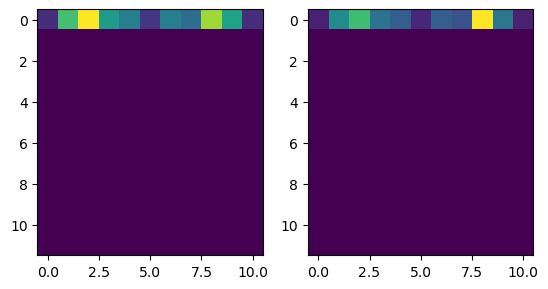

In [43]:
# plot policy by state 
u = 1
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [44]:
old_Q = old_Q.reshape(U * (K+1), T * (K+1))
Q = g.Q.reshape(U * (K+1), T * (K+1))

In [45]:
old_Q[idx].reshape(T, K+1)[:,0], Q[idx].reshape(T, K+1)[:,0]

(array([ -48. ,  -42. , -295.2, -327.6, -177.6,  -18. ,  -69.6,   -6. ,
           0. , -360. , -144. ]),
 array([ -48. ,  -42. , -276. , -308.4, -158.4,  -18. ,  -50.4,   -6. ,
           0. , -302.4,  -86.4]))

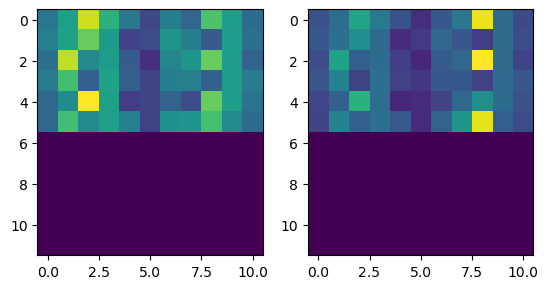

In [46]:
# plot policy by state 
u = 0
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

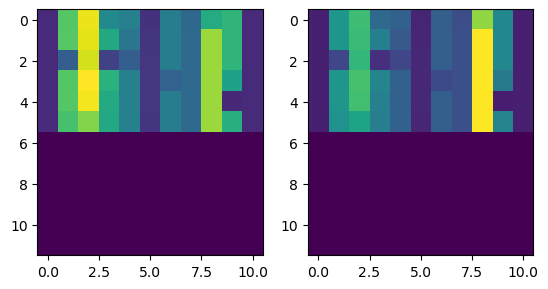

In [47]:
# plot policy by state 
u = 1
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [48]:
# system dynamics
old_b_star, system.b_star

(array([ 3.,  6.,  9., 10., 11., 13., 15., 16., 17., 12.,  4.]),
 array([ 3.,  6.,  9., 10., 11., 13., 15., 16., 17., 12.,  4.]))

In [49]:
old_psi, system.psi

(array([1.        , 1.        , 0.6       , 0.5       , 0.75      ,
        0.25      , 0.4       , 0.25      , 0.33333333, 0.57142857,
        0.4       ]),
 array([1.        , 1.        , 0.6       , 0.5       , 0.75      ,
        0.25      , 0.4       , 0.25      , 0.33333333, 0.57142857,
        0.4       ]))

In [50]:
old_slow_lane_queue, system.slow_lane_queue

(array([ 0.,  0., 27., 31., 16.,  0.,  6.,  0.,  0., 35., 10.]),
 array([ 0.,  0., 25., 29., 14.,  0.,  4.,  0.,  0., 29.,  4.]))

# Output V3 (100 days)

In [108]:
with open('output_V3/groups.pkl', 'rb') as f:
    groups = pickle.load(f)

with open('output_V3/error_vec.pkl', 'rb') as f:
    error_vec = pickle.load(f)

with open('output_V3/simulation_params.pkl', 'rb') as f:
    n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_V3/system.pkl', 'rb') as f:
    system = pickle.load(f)

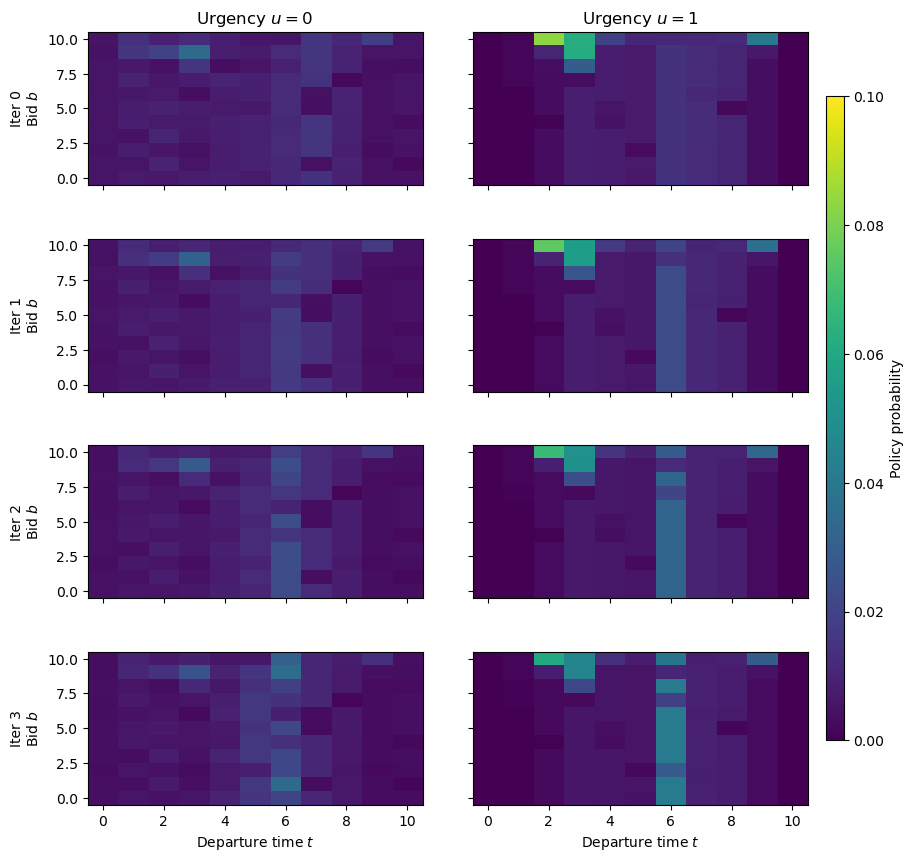

In [109]:
import matplotlib.pyplot as plt
import numpy as np

n_iter = 4
u_values = [0, 1]
k = 10

fig, axes = plt.subplots(
    n_iter, 2,
    figsize=(9, 2.3 * n_iter),
    sharex=True, sharey=True
)

for it in range(n_iter):

    # ---- Store policy BEFORE update ----
    pi_before = {}
    for u in u_values:
        idx = u * (K + 1) + k
        pi_before[u] = groups[0].pi[idx].reshape(T, K+1).T

    # ---- One-day simulation ----
    travelers = groups[0].travelers

    for tr in travelers:
        tr.store_start_state()
        tr.action()

    system.simulate_lane_queue()

    for tr in travelers:
        tr.paid_karma_bid()

    system.karma_redistribution()

    for tr in travelers:
        tr.update_urgency()

    for g in groups:
        g.update_policy(system)
        g.update_transition_matrix()

    # ---- Plot ----
    for col, u in enumerate(u_values):
        ax = axes[it, col]

        im = ax.imshow(
            pi_before[u][:11],
            origin="lower",
            aspect="auto",
            vmin=0,
            vmax=0.1
        )

        if it == 0:
            ax.set_title(f"Urgency $u={u}$")

        if col == 0:
            ax.set_ylabel(f"Iter {it}\nBid $b$")

        if it == n_iter - 1:
            ax.set_xlabel("Departure time $t$")

# ---- Manual layout control ----
plt.subplots_adjust(
    left=0.08,
    right=0.88,
    top=0.92,
    bottom=0.08,
    hspace=0.35,
    wspace=0.15
)

# ---- Dedicated colorbar axis ----
cax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("Policy probability")

plt.show()


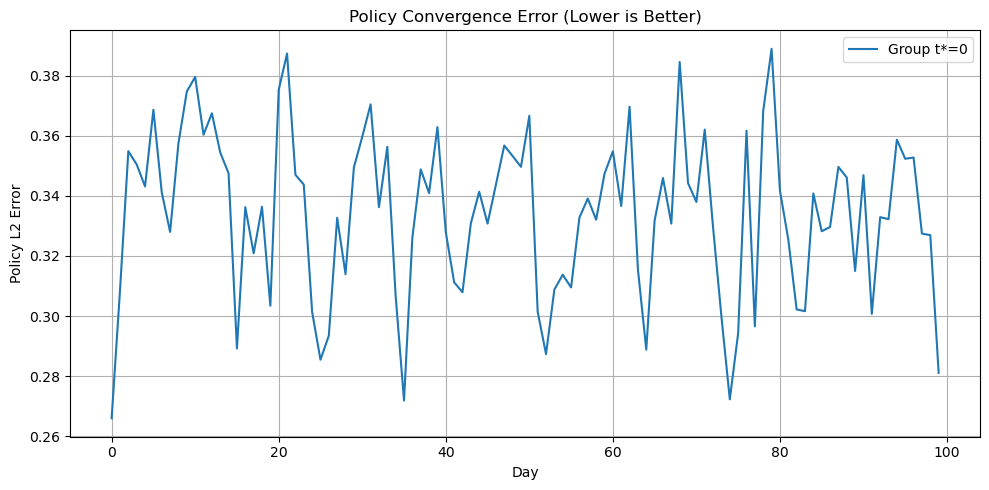

In [103]:
plot_policy_convergence(error_vec, n_day, n_groups)

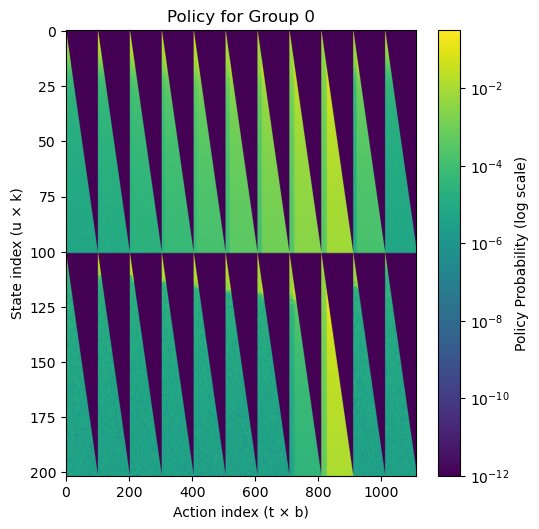

In [59]:
plot_final_policies(groups, n_groups)

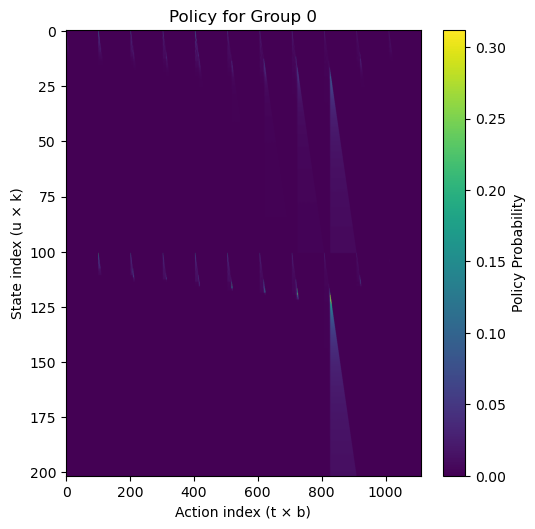

In [60]:
plot_final_policies_linear(groups, n_groups)

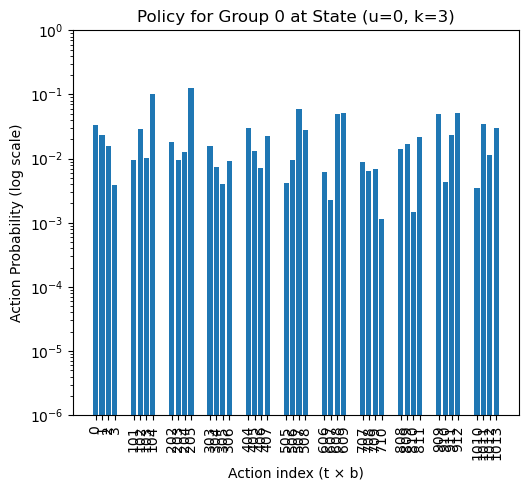

In [55]:
specific_u = 0
specific_k = 3

plot_specific_state_policy(groups, n_groups, K, specific_u, specific_k)

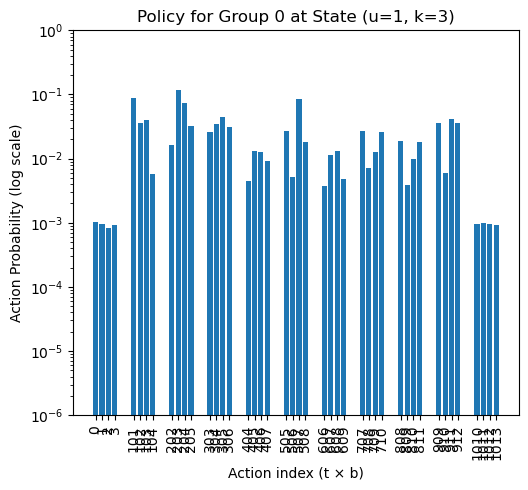

In [56]:
specific_u = 1
plot_specific_state_policy(groups, n_groups, K, specific_u, specific_k)

# Output V4 (more days)

In [ ]:
with open('output_V4/groups.pkl', 'rb') as f:
    groups = pickle.load(f)

with open('output_V4/error_vec.pkl', 'rb') as f:
    error_vec = pickle.load(f)

with open('output_V4/simulation_params.pkl', 'rb') as f:
    n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_V4/system.pkl', 'rb') as f:
    system = pickle.load(f)